Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Paulo Santiago"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

In [3]:
# start 60 months ago
end = datetime.datetime(2022, 7, 31)
start = datetime.datetime(2017, 7, 31)

### Option 2 - Using Yahoo Finance `yfinance` library

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Question 2
Using Yahoo Finance, downloading AMZN, FB, MMM, and IBM stock prices from July 31st 2017 to 2022.

In [5]:
# Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)
fb = yf.download('FB', start=start)
mmm = yf.download('MMM', start=start)
ibm = yf.download('IBM', start=start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# I used Yahoo Finance Data
# Created a Data Frame with AMZN, FB, MMM, and IBM with a start date of 60 months ago
all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [7]:
# AMZN
amzn_adj = amzn['Adj Close']
amzn_adj

Date
2017-07-31     49.389000
2017-08-01     49.809502
2017-08-02     49.794498
2017-08-03     49.346001
2017-08-04     49.379002
                 ...    
2022-07-25    121.139999
2022-07-26    114.809998
2022-07-27    120.970001
2022-07-28    122.279999
2022-07-29    134.949997
Name: Adj Close, Length: 1259, dtype: float64

In [8]:
# FB
fb_adj = fb['Adj Close']
fb_adj

Date
2017-07-31    169.250000
2017-08-01    169.860001
2017-08-02    169.300003
2017-08-03    168.589996
2017-08-04    169.619995
                 ...    
2022-07-25    166.649994
2022-07-26    159.149994
2022-07-27    169.580002
2022-07-28    160.720001
2022-07-29    159.100006
Name: Adj Close, Length: 1259, dtype: float64

In [9]:
# IBM
ibm_adj = ibm['Adj Close']
ibm_adj

Date
2017-07-31    109.257179
2017-08-01    109.732971
2017-08-02    109.091026
2017-08-03    109.461067
2017-08-04    109.627228
                 ...    
2022-07-25    128.539993
2022-07-26    128.080002
2022-07-27    129.119995
2022-07-28    129.220001
2022-07-29    130.789993
Name: Adj Close, Length: 1259, dtype: float64

In [10]:
# MMM
mmm_adj = mmm['Adj Close']
mmm_adj

Date
2017-07-31    171.842819
2017-08-01    173.559769
2017-08-02    175.464691
2017-08-03    177.352509
2017-08-04    177.378113
                 ...    
2022-07-25    134.119995
2022-07-26    140.750000
2022-07-27    138.860001
2022-07-28    140.369995
2022-07-29    143.240005
Name: Adj Close, Length: 1259, dtype: float64

# Question 3

In [11]:
# AMZN resample monthly, replace missing data with the last business day adjusted close price
amzn_adj_month = amzn_adj.asfreq(freq = 'M', method = 'pad')
amzn_adj_month

Date
2017-07-31     49.389000
2017-08-31     49.029999
2017-09-30     48.067501
2017-10-31     55.264000
2017-11-30     58.837502
2017-12-31     58.473499
2018-01-31     72.544502
2018-02-28     75.622498
2018-03-31     72.366997
2018-04-30     78.306503
2018-05-31     81.481003
2018-06-30     84.989998
2018-07-31     88.872002
2018-08-31    100.635498
2018-09-30    100.150002
2018-10-31     79.900497
2018-11-30     84.508499
2018-12-31     75.098503
2019-01-31     85.936501
2019-02-28     81.991501
2019-03-31     89.037498
2019-04-30     96.325996
2019-05-31     88.753502
2019-06-30     94.681503
2019-07-31     93.338997
2019-08-31     88.814499
2019-09-30     86.795502
2019-10-31     88.833000
2019-11-30     90.040001
2019-12-31     92.391998
2020-01-31    100.435997
2020-02-29     94.187500
2020-03-31     97.486000
2020-04-30    123.699997
2020-05-31    122.118500
2020-06-30    137.940994
2020-07-31    158.233994
2020-08-31    172.548004
2020-09-30    157.436493
2020-10-31    151.80

In [12]:
# FB resample monthly, replace missing data with the last business day adjusted close price
fb_adj_month = fb_adj.asfreq(freq = 'M', method = 'pad')
fb_adj_month.tail()

Date
2022-02-28    211.029999
2022-03-31    222.360001
2022-04-30    200.470001
2022-05-31    193.639999
2022-06-30    161.250000
Freq: M, Name: Adj Close, dtype: float64

In [13]:
# IBM resample monthly, replace missing data with the last business day adjusted close price
ibm_adj_month = ibm_adj.asfreq(freq = 'M', method = 'pad')
ibm_adj_month.tail()

Date
2022-02-28    121.041695
2022-03-31    128.461685
2022-04-30    130.625443
2022-05-31    138.839996
2022-06-30    141.190002
Freq: M, Name: Adj Close, dtype: float64

In [14]:
# MMM resample monthly, replace missing data with the last business day adjusted close price
mmm_adj_month = mmm_adj.asfreq(freq = 'M', method = 'pad')
mmm_adj_month.tail()

Date
2022-02-28    147.162796
2022-03-31    147.390503
2022-04-30    142.777130
2022-05-31    149.289993
2022-06-30    129.410004
Freq: M, Name: Adj Close, dtype: float64

## Question 4 - AMZN

Text(0.5, 0, 'Lag (Months)')

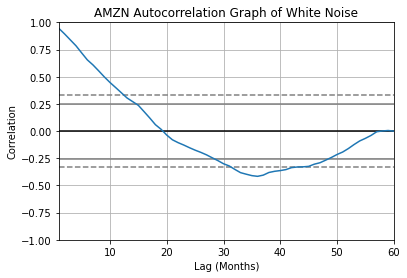

In [15]:
# AMZN Autocorrelation Analysis
amzn_autocorrelation = pd.plotting.autocorrelation_plot(amzn_adj_month)
amzn_autocorrelation.set_title("AMZN Autocorrelation Graph of White Noise")
amzn_autocorrelation.set_ylabel("Correlation")
amzn_autocorrelation.set_xlabel("Lag (Months)")

By looking at Amazon's monthly adjusted close prices white noise graph, we can see it has autocorrelation. The autocorrelation coefficents are significant as they do not average a value of 0. Looking at the white noise graph, starting at the lag 60 time interval, we can see the adjusted closed prices are weakly/moderately negatively correlated to the price. Over time as it approaches lag 0, it trends to a moderate to strong positive correlation. The closer it approaches the current time, the previous prices are strongly affecting the price.

## Question 5 - AMZN

Text(0.5, 0, 'Lag (Months)')

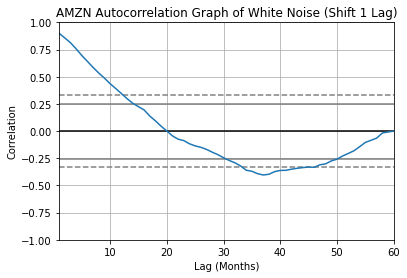

In [16]:
# Shift AMZN monthly prices by 1 month and fill NaN value with 0
amzn_adj_month_shift = amzn_adj_month.shift(1, fill_value=0)

amzn_shift_autocorrelation = pd.plotting.autocorrelation_plot(amzn_adj_month_shift)
amzn_shift_autocorrelation.set_title("AMZN Autocorrelation Graph of White Noise (Shift 1 Lag)")
amzn_shift_autocorrelation.set_ylabel("Correlation")
amzn_shift_autocorrelation.set_xlabel("Lag (Months)")

After shifting Amazon's time series forward 1 lag, the white noise graph looks very similar to the original graph without shifting the lag. At 60 lag, we can see the price is weakly/moderately correlated and as it approaches a lag of 1, it trends to a strongly positive correlation. 

## Question 4 - FB

Text(0.5, 0, 'Lag (Months)')

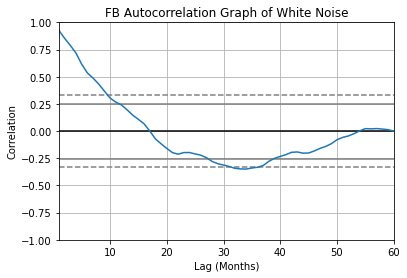

In [17]:
fb_autocorrelation = pd.plotting.autocorrelation_plot(fb_adj_month)
fb_autocorrelation.set_title("FB Autocorrelation Graph of White Noise")
fb_autocorrelation.set_ylabel("Correlation")
fb_autocorrelation.set_xlabel("Lag (Months)")

By looking at Facebook's monthly adjusted close prices white noise graph, it is very similar to Amazon's autocorellation graph. There is autocorrelation. The autocorrelation coefficents are significant as they do not average a value of 0. Looking at the white noise graph, starting at the lag 60 time interval, we can see the adjusted closed prices are weakly/moderately negatively correlated to the price. Over time as it approaches lag 0, it trends to a moderate to strong positive correlation.

## Question 5 - FB

Text(0.5, 0, 'Lag (Months)')

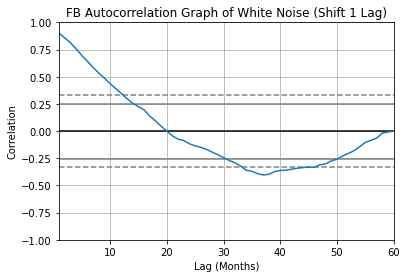

In [18]:
# Shift FB monthly prices by 1 month and fill NaN value with 0
fb_adj_month_shift = amzn_adj_month.shift(1, fill_value=0)

fb_shift_autocorrelation = pd.plotting.autocorrelation_plot(amzn_adj_month_shift)
fb_shift_autocorrelation.set_title("FB Autocorrelation Graph of White Noise (Shift 1 Lag)")
fb_shift_autocorrelation.set_ylabel("Correlation")
fb_shift_autocorrelation.set_xlabel("Lag (Months)")

FB's autocorrelation with a shift of 1 lag is similar to the original autocorrelation. However, the correlation looks smoother compared to the original. The amount of lag shifts does not affect FB prices, regardless of the number of lag shifts.

## Question 4 - IBM

Text(0.5, 0, 'Lag (Months)')

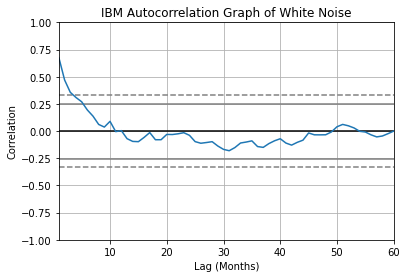

In [19]:
ibm_autocorrelation = pd.plotting.autocorrelation_plot(ibm_adj_month)
ibm_autocorrelation.set_title("IBM Autocorrelation Graph of White Noise")
ibm_autocorrelation.set_ylabel("Correlation")
ibm_autocorrelation.set_xlabel("Lag (Months)")

For IBM, their monthly adjusted close prices white noise graph is different from the previous two. The autocrolletion coffecient averages around 0, and are not significant. Starting from lag 60, the trend of the correlation coefficient is weakly negatively correlated.

## Question 5 - IBM

Text(0.5, 0, 'Lag (Months)')

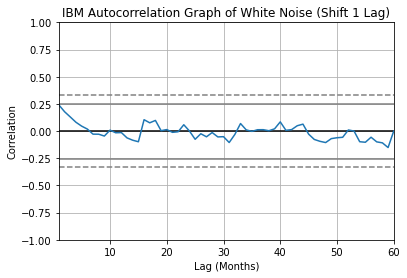

In [20]:
# Shift IBM monthly prices by 1 month and fill NaN value with 0
ibm_adj_month_shift = ibm_adj_month.shift(1, fill_value=0)

ibm_shift_autocorrelation = pd.plotting.autocorrelation_plot(ibm_adj_month_shift)
ibm_shift_autocorrelation.set_title("IBM Autocorrelation Graph of White Noise (Shift 1 Lag)")
ibm_shift_autocorrelation.set_ylabel("Correlation")
ibm_shift_autocorrelation.set_xlabel("Lag (Months)")

The IBM autocorrelation graph with a shift of 1 lag is a lot different that the original. The original correlation coefficients mostly trended weakly negatively, however with the shift, the new graph hovers around a correlation coefficient of 0. We can see some irregularity where the graph spikes barely above and below 0, but not a lot to make the coefficient significant. This could mean that the time frame at lag 0 originally is affected by the previous trends, but now with a lag of 1 we can see that previous prices do not affect the current price as much.

## Question 4 - MMM

Text(0.5, 0, 'Lag (Months)')

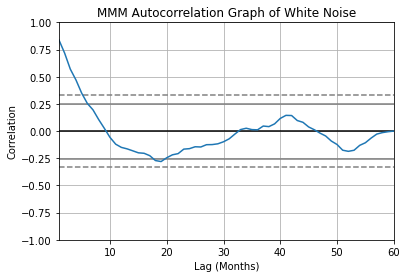

In [21]:
mmm_autocorrelation = pd.plotting.autocorrelation_plot(mmm_adj_month)
mmm_autocorrelation.set_title("MMM Autocorrelation Graph of White Noise")
mmm_autocorrelation.set_ylabel("Correlation")
mmm_autocorrelation.set_xlabel("Lag (Months)")

By looking at MMM's monthly adjusted close prices white noise graph there is almost no autocorrelation. The autocorrelation coefficents are not too significant as they average around a value of 0. Starting at the lag 60 time interval, it starts off with a weak negative correlation coefficient, then turns positive, then around the lag 32 time interval it becomes a weak negative correlation again.

## Question 5 - MMM

Text(0.5, 0, 'Lag (Months)')

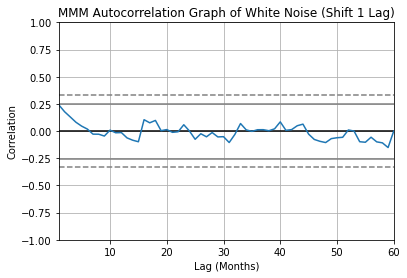

In [22]:
# Shift MMMM monthly prices by 1 month and fill NaN value with 0
mmm_adj_month_shift = ibm_adj_month.shift(1, fill_value=0)

mmm_shift_autocorrelation = pd.plotting.autocorrelation_plot(mmm_adj_month_shift)
mmm_shift_autocorrelation.set_title("MMM Autocorrelation Graph of White Noise (Shift 1 Lag)")
mmm_shift_autocorrelation.set_ylabel("Correlation")
mmm_shift_autocorrelation.set_xlabel("Lag (Months)")

The new autocorrelation graph of MMM with a lag shift of 1 is similar to IBM's graph with a lag shift of 1. The correlation coefficients become almost insignificant as the values average around 0. The values over time show some irregularity, but not significantly. This means that MMM's current adjusted close price is not affected by the previous close prices.

# Question 6

In [23]:
# Adjusted Close values of all stocks
adj_close_data = all_stocks['Adj Close']
adj_close_data

# Select only adjusted close prices for the end of each business month
all_stocks_adj_month = all_stocks['Adj Close'].asfreq(freq = 'M', method = 'pad')
#all_stocks_adj_month

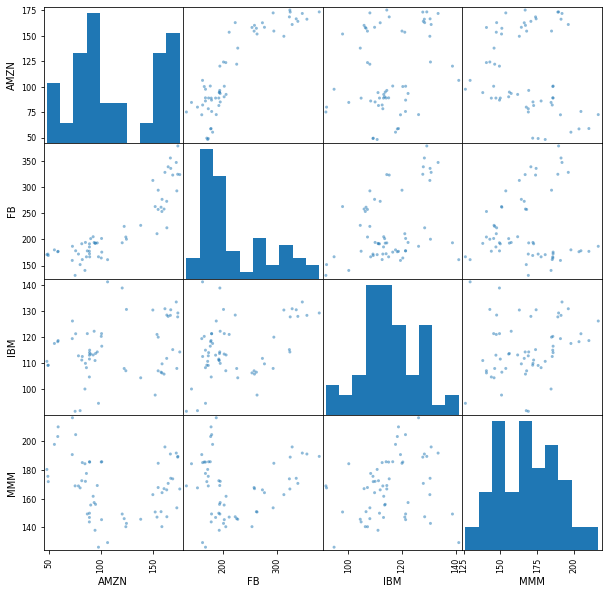

In [24]:
all_stocks_scatter = pd.plotting.scatter_matrix(all_stocks_adj_month, figsize = (10,10))

## AMZN
Starting with AMZN's scatter plot matrix, we can see that FB prices look strongly correlated to AMZN's prices, whereas IBM and MMM look more random. We can see FB's affect and correlation on AMZN because when FB's prices are at it's lowest, AMZN's prices are also low. In addition, when FB prices are higher, AMZN prices start to rise and increase in price. These two stocks strongly influence each other. IBM and MMM look to be more random, there are some clusters of data to look at. When AMZN is at a low price, IBM has a large cluster of prices in the middle. When AMZN is higher, there is a smaller cluster of data where the prices range from the middle to higher prices. MMM has some data points where their price is higher when AMZN is low. Furthermore, when AMZN has prices in the middle, IBM and MMM have varying points of data that seem random.

## FB
Just like with AMZN, when AMZN prices are low, we can see FB prices are lower. And when FB prices are higher, so is AMZN. With IBM, there is a large cluster of data when FB prices are lower. We can see that IBM's prices hover around the middle. In addition, there is a trend when FB prices increase, we can see a weak positive correlation of IBM prices increasing. For MMM, when FB prices are low MMM's prices vary from their lowest to highest. FB has some correlation with their stock prices. Likewise to IBM, when FB prices increase we can also see a weak positive correlation that increases MMM's prices.

## IBM
Starting with AMZN, their prices are at its highest when IBM is at its lowest and highest prices. AMZN is at its lowest price when IBM's prices are in the middle. There is some correlation between these two stocks. For FB, we can see a large cluster of data. FB prices are at it's lowest when IBM's prices are in the middle. Furthermore, there is a very weak positive correlation overall. When IBM's prices increase so does FB's very weakly. MMM has a small cluster in the middle. When IBM has its prices in the middle, MMM does as well, however it is hard to determine if there is any correlation at all because MMM's prices look random.

## MMM
AMZN looks like there is a very weak negative correlation with MMM. When MMM stock prices increase, AMZN prices trend downward lowering their stock prices. However, when MMM has their prices in the middle, AMZN has it's highest and lowest prices. FB looks like it is at it's lowest price points regardless of MMM's prices. On the other hand, there is another cluster where FB's prices also trend upward when MMM has prices in the middle. IBM appears to have a very weak positive correlation to MMM's prices. As MMM's prices increase, IBM's slightly increase as well but it also looks random.